In [1]:
# Importing Libraries
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
parquet_file= r'C:\Users\verma\OneDrive\Desktop\PYTHON_DATA_PROJECT\1_Data_science_job_postings_dataset\0000.parquet'
df = pd.read_parquet(parquet_file, engine='auto')

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill:ast.literal_eval(skill) if pd.notna(skill) else skill)

In [2]:
dff = df.dropna(subset=['salary_year_avg'])
df_analyst = dff[(dff['job_title_short'] == 'Data Analyst') & (dff['job_country'] == 'United States')].copy()

In [3]:
total_no_of_job_postings = len(df_analyst)

In [4]:
df_exploded = df_analyst.explode('job_skills')

In [32]:
df_plot =df_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values('count', ascending=False).head(10)

In [35]:
df_plot['skills_percentage'] =( df_plot['count'] / total_no_of_job_postings) *100

Text(0.5, 0, 'Percent of Data Analyst Job')

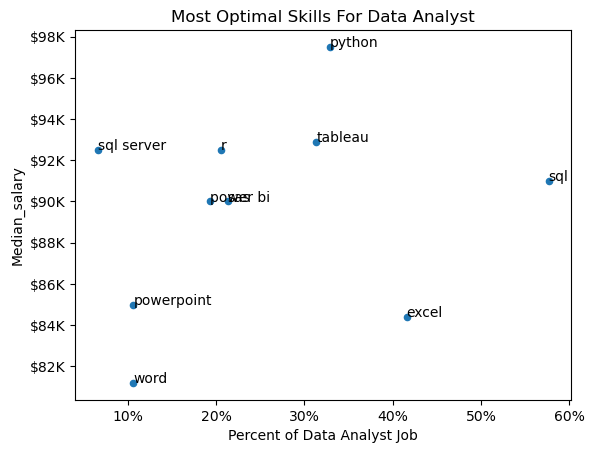

In [47]:
# Scatter plot
df_plot.plot(kind='scatter', x='skills_percentage', y='median')

# Adding text labels to each point
for i, skill in enumerate(df_plot.index):
    plt.text(df_plot['skills_percentage'].iloc[i], df_plot['median'].iloc[i],skill)
ax =plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'{int(x)}%')) 
plt.title('Most Optimal Skills For Data Analyst')
plt.ylabel('Median_salary')
plt.xlabel('Percent of Data Analyst Job')